# Python refereces In and Out

When programming in Python, one of the most confusing topic, or the topic that you should be very careful about is object references. Without a thorough understanding on how it works, you may encounter some surprise when creating/modifying objects.

Let's first take a look at a few examples.

### * a start example

we create a list to each student's permformance score, and by default set it to be 100. Therefore, we have two students, each has a list of 4 score of 100. <br>
Now, we update student1's score to 98. Let's see what will happen.

In [21]:
# Example 1, student scores
student1 = student2 = [100, 100, 100, 100]
student1[0] = 98

print(student1, student2)

[98, 100, 100, 100] [98, 100, 100, 100]


Hold on a secend, I only want to update student1's score, why did the student2's scores also got modified ? !

So why does the program behave in this way ? To understand what behind the scene, there are a couple of concepts we will go over: <br> 1. python references <br> 2. memory management in Python <br> 3. python names and variables

A little bit more background of python object: 

## 1. Python object <br>

In python, everything is a object, a varaible, a data type and even a function.  <br>
<br>
Each object contains at least three pieces of data:

* Reference count (memory management) <br>
* Type (at Cpython layer) <br>
* Value <br>

<br>

## 2. Python memory management <br> 

Python tends to try to abstract away implementation details like memory addresses from its users. Python often focuses on usability instead of speed. As a result, pointers in Python don’t really make sense. However, we can still think from a pointer/referrence perspective, that help us to understand how python works.

### * memory address 

we can test if the two variables point to the same object/share the same memory location by:

* id() returns the object’s memory address.
* is returns True if and only if two objects have the same memory address. "x is y"


## 3. Immutable /Mutable objects

This shouldn't be a unfamilar concept in any programming language.  A object is immutable means you cannot modify the object's value directly, but you can update the variable be reassigning a new value to it.

#### * Immutable Objects

In [104]:
string1 = 'apple' # creating two objects by alias
string1[2] = 'w'

TypeError: 'str' object does not support item assignment

In [109]:
#but you can do this:
string1 = "Apple Inc"

#### * mutable objects

In [105]:
list1 =['apple', 'banana', 'orange']

In [108]:
list1[0] = 'Apple Inc'

print(list1)

['Apple Inc', 'banana', 'orange']


## 4. Alias 
In Python, when you assign a varaible to another (y = 1, x = y), instead of cloning the variable, the two variables are pointing to the same object in memory. Therefore, it's called Alias.

## 5. Names and variables in Python 

Python has names, not variables.
What is the difference? Variables own the actual memory block as compare to names points to the reference to the  object memory.
<br>
The Python name x (although it is not a variable, people also call them varaibles unofficially ) doesn’t directly own any memory address, it points to a reference to an object instead. 

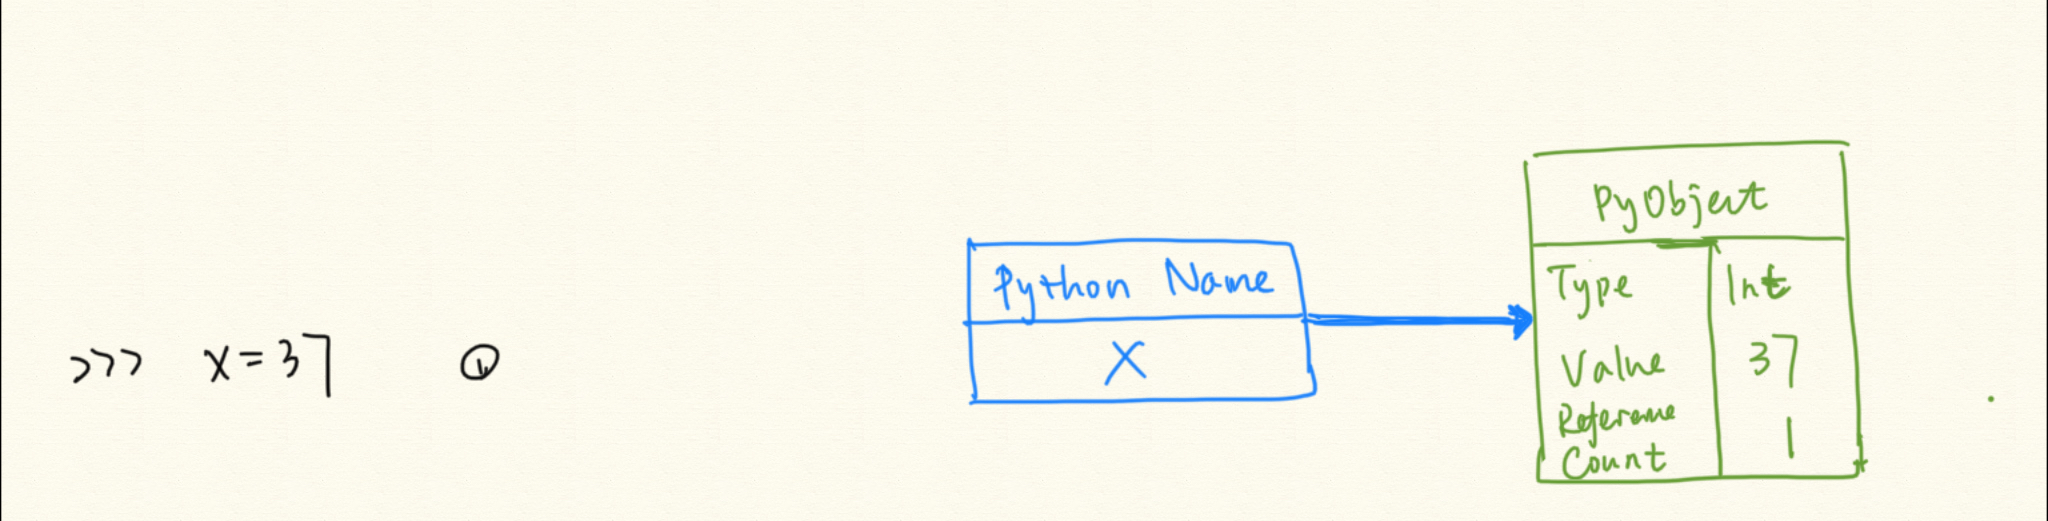

When you reassign value 38 to x, the actual action is: python Name X will point to a new PyObject with value 38 and a different memory address.

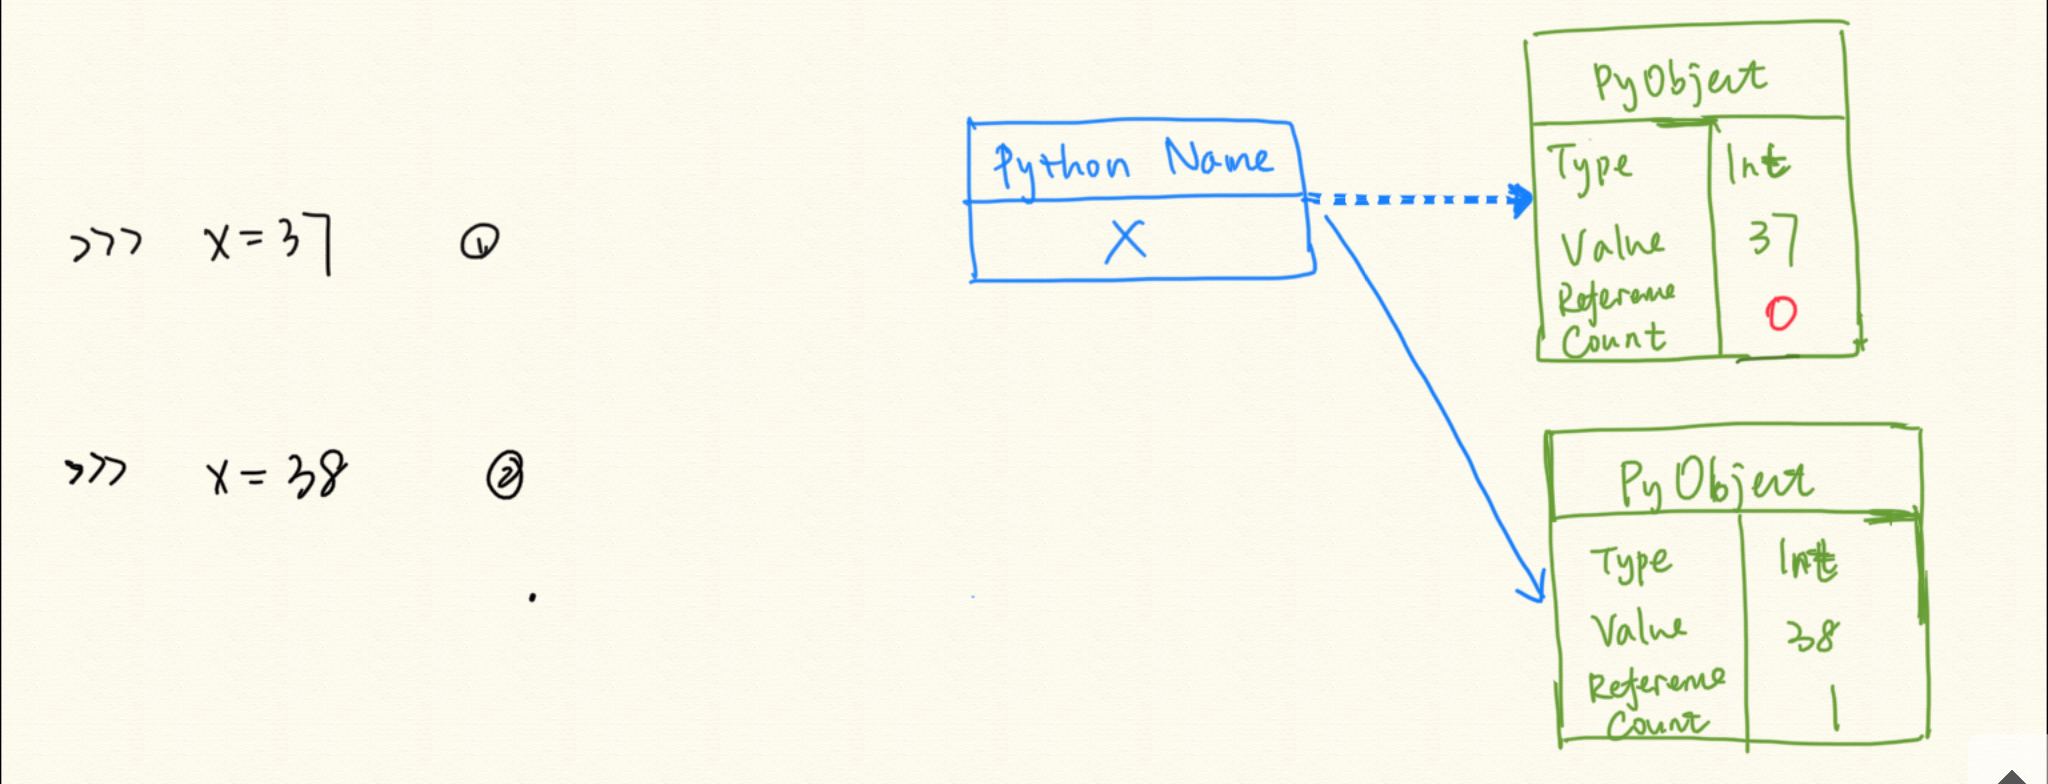

When you create a new variable Y as a alia as X, it is a new Python name Y but point to the same PyObject (value = 38 and memoryID = 0002)

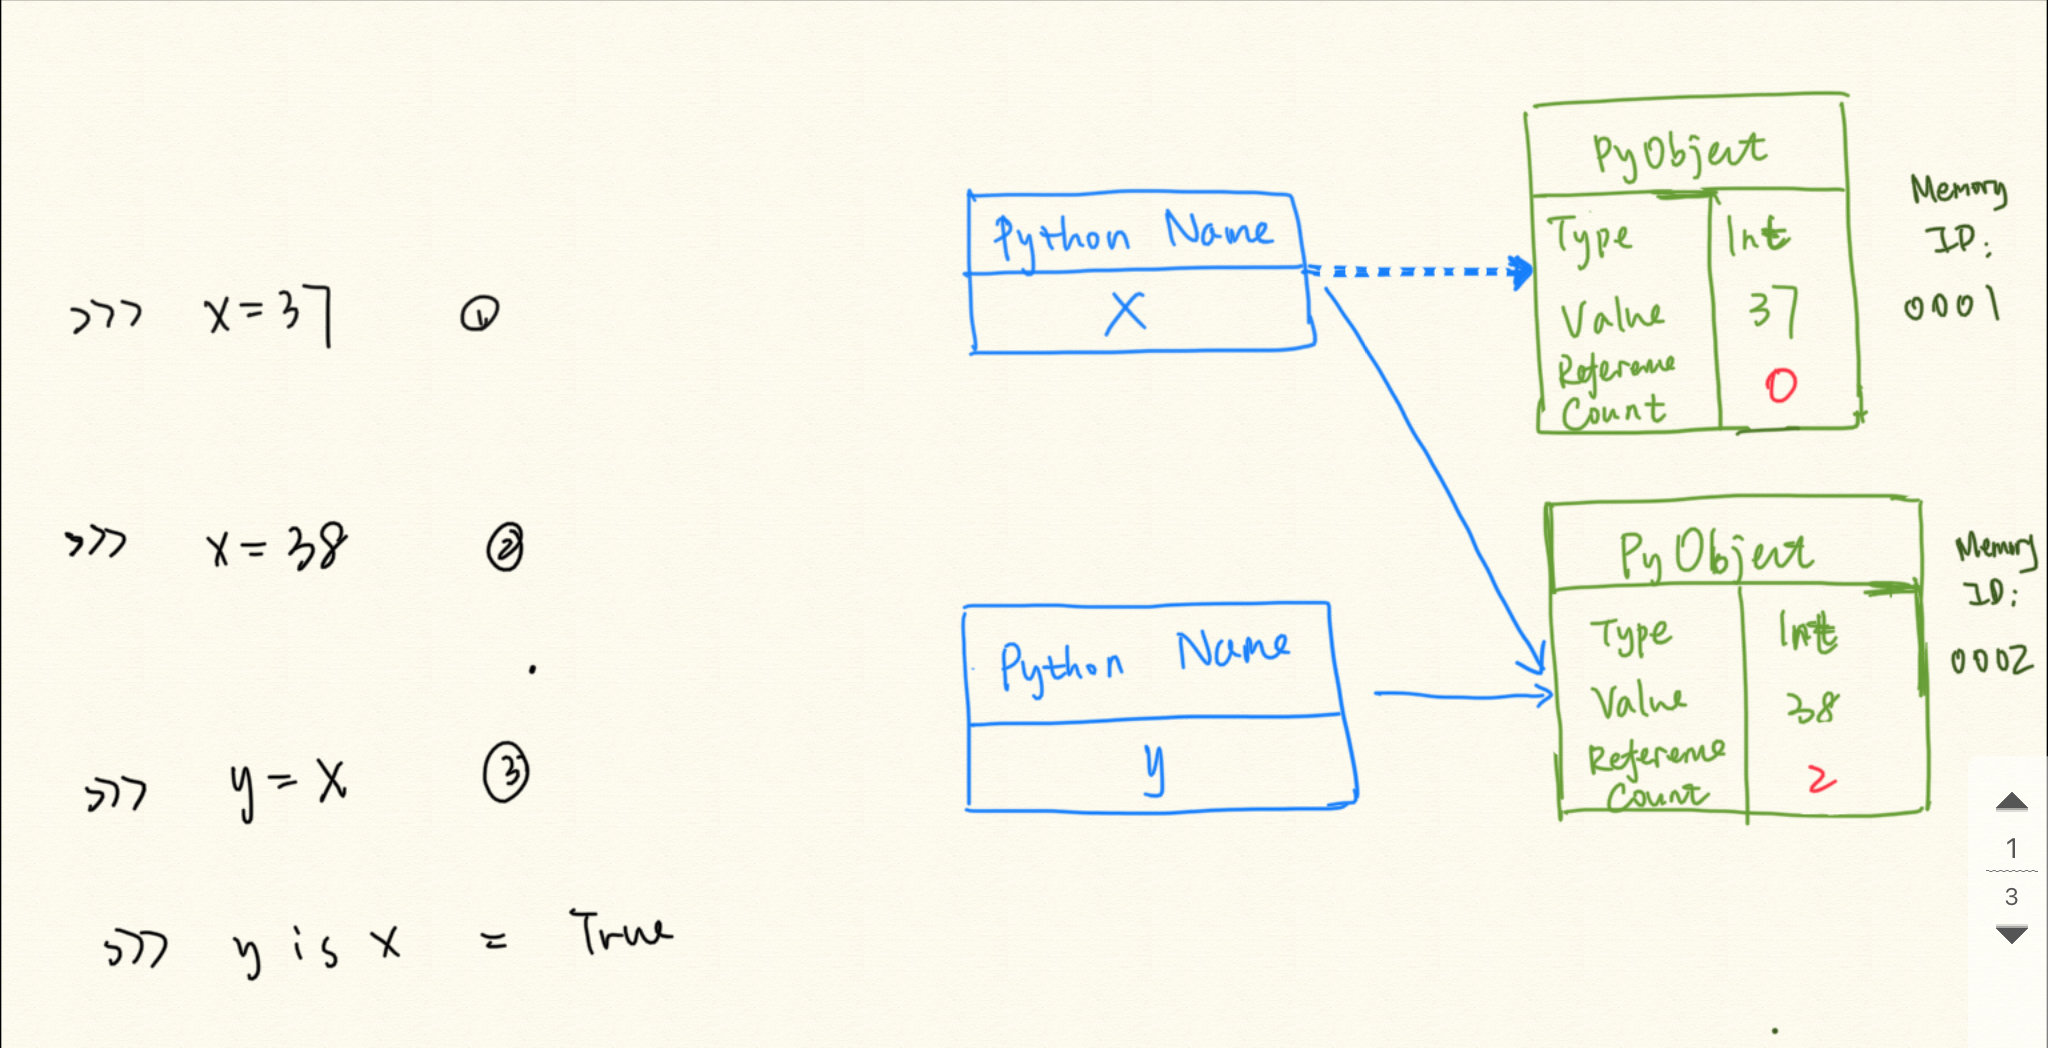

When you update Y's values, python create a new PyObject with Value 39 and python Name Y will point to the new PyObject instead. Now X and Y no long share the same object/memory ID as we saw in the previous example. 

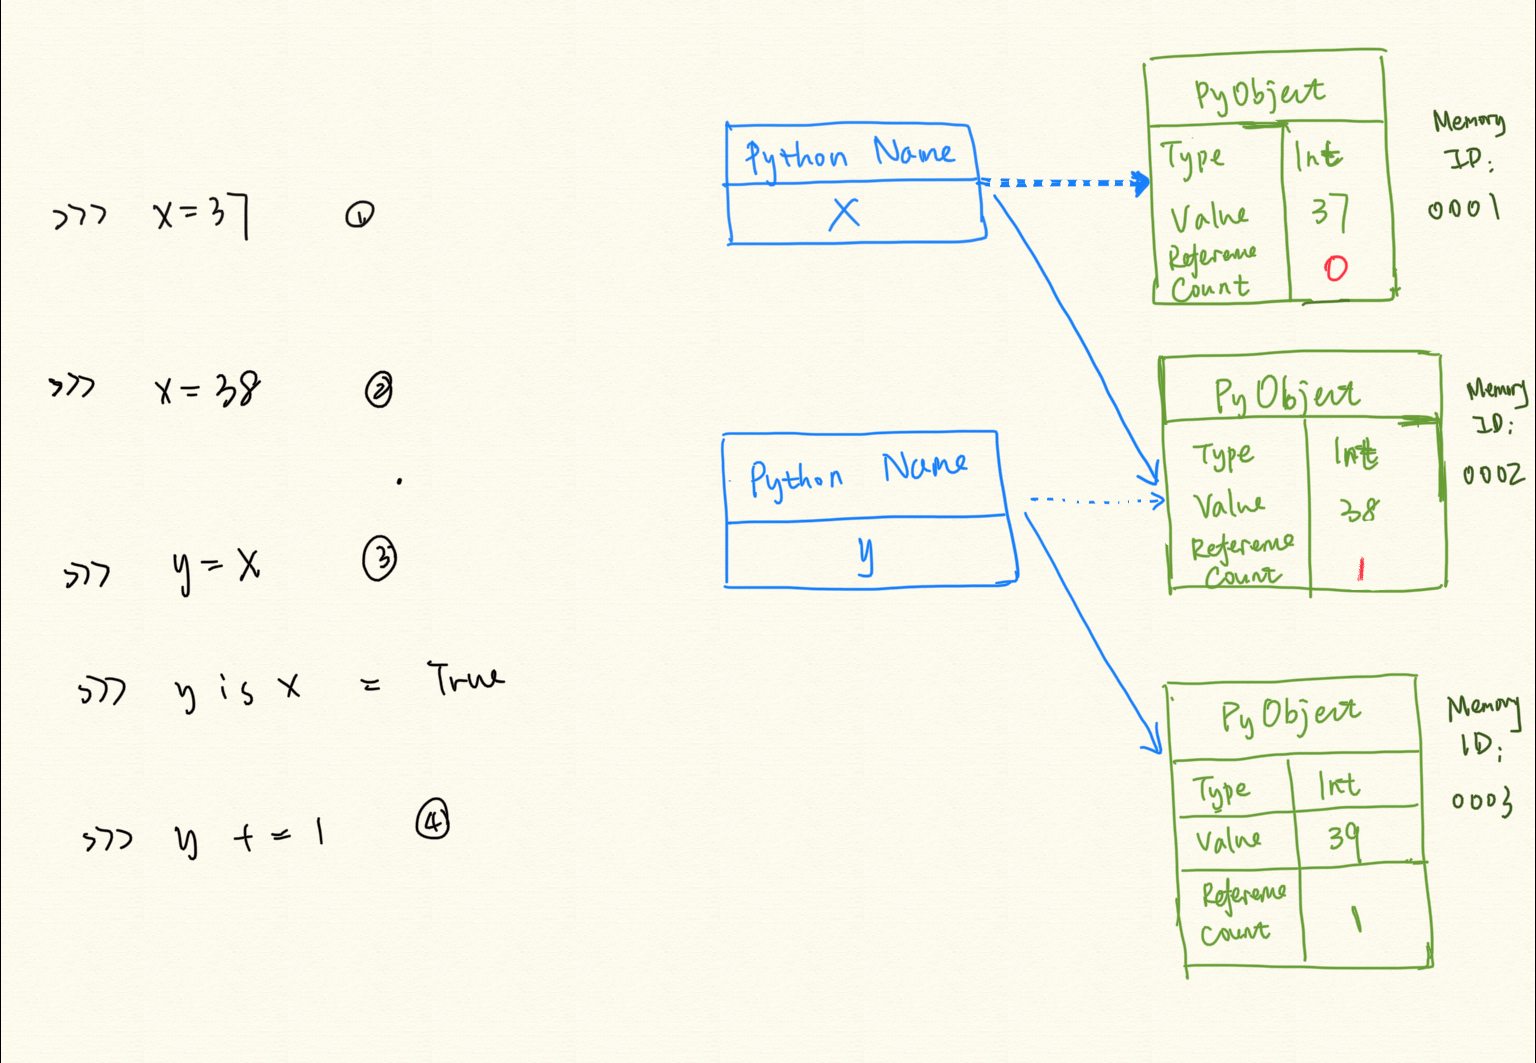

The same example with list can be more complicated but worth mentioning. 

## 6. Objects references and Alias in Python¶

Here comes the most exciting(confusing?) part!!!

Creating multiple objects by alias and see how modifying one object impacts others and how different mutable and immutable objects are.

#### * Immutable Objects

First, let's take a look at an immutable example: string type. When a object is immutable:

1. When assign values by alias, the two objects share the same memory ID, meaning they point to the same PyObject.
2. Updating one variable won't cause the other variable change. Instead, a new object with updated value will be created.

In [114]:
# string and tuple is immutable
# e.g.
string1 = string2 = 'apple' # creating two objects by alias
print("innitial memory address: {}, {}".format(id(string1), id(string2)))

innitial memory address: 4408291952, 4408291952


Trying to modify the object will cause an exception:

Below, we will see when trying to change one object value by assignment, it works as expected.

In [122]:
string1 = 'apple Inc.'
print("string1 : {} \nstring2: {} ".format(string1, string2))
print("Memory address after updating first variable: {}, {}".format(id(string1), id(string2)))

string1 : apple Inc. 
string2: apple 
Memory address after updating first variable: 4409069872, 4408291952


At first, the two variable string1 and string2 has the same memory address (id = 4408291952), when updated string1, string2 remind the same and string1's memory address (id(string1) = 4408295216 ) got updated too. 

#### * mutable objects

Similar to the immutable example, two objects list1 and list2 has the same memory address (ids), when you create them in a Alias way.

In [102]:
list1 = list2 = ['apple', 'banana', 'orange']
print("innitial memory address: {}, {}".format(id(list1), id(list2)))

innitial memory address: 4407425776, 4407425776


* Scenario 1: When you directly assign new values to a mutable variable, the result is as expected.

In [103]:
list1 = ['hello'] # direct reassign will also create new variable
print("innitial memory address: {}, {}".format(id(list1), id(list2)))
print(list1, list2)

innitial memory address: 4407423056, 4407425776
['hello'] ['apple', 'banana', 'orange']


* Scenario 2:  Modify the object directly will cause both variable to be updated. <br>
let's reset the problem. <br>

In [15]:
list1 = list2 = ['apple', 'banana', 'orange']
print("innitial memory address: {}, {}".format(id(list1), id(list2)))

innitial memory address: 4407415744, 4407415744


In [16]:
list1[0] = 'apple Inc.'

In [17]:
print(list1, list2)
print("innitial memory address: {}, {}".format(id(list1), id(list2)))


['apple Inc.', 'banana', 'orange'] ['apple Inc.', 'banana', 'orange']
innitial memory address: 4407415744, 4407415744


Why? Because when you update one element in a list, it only changes one cell in the yellow box, which is the reference. When you reassign the value to a list/variable, name list1 will refer to different reference location (yollow box) so the two objects are no longer related.

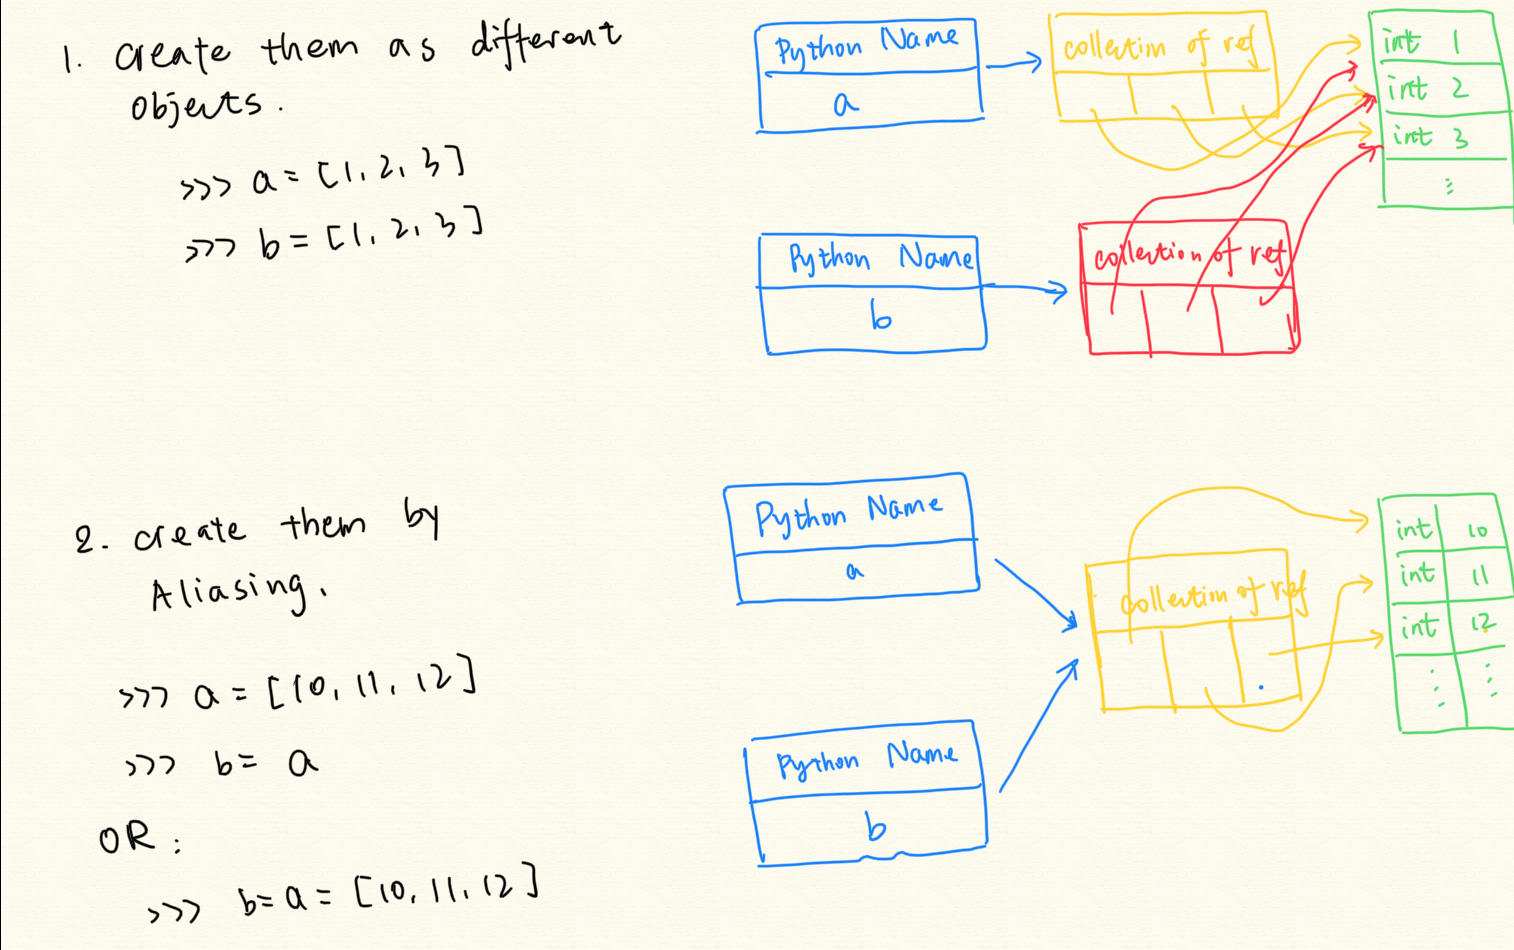

Now both varible got updated and the memory id remain the same

* Scenario 3: creating two variables with the same value seperately, there wont be alias. <br>
When the two variables are created seperately, there wont be such confusions and the two variables point to two different memory IDs.

In [33]:
list1 =  ['apple', 'banana', 'orange']
list2 = ['apple', 'banana', 'orange']
print("innitial memory address: {}, {}".format(id(list1), id(list2)))

innitial memory address: 4409042256, 4409042176


In [ ]:
See the two objects have different memory IDs.

In [35]:
list1[0] = 'apple Inc.'
print (list1, list2)
print(id(list1), id(list2))

['apple Inc.', 'banana', 'orange'] ['apple', 'banana', 'orange']
4409042256 4409042176


Here only list1 got updated and the memory id remain the same for both variables.

## 7. List repetition

List is a widely used data type in Python. I just want to nag one more thing on list usage as it is very important and could be confusing without caution.

In [61]:
e = [1,2,3]
o = e*3
n = [e] * 3
print ("o = e * 3: ", "\n", o)
print ("n = [e] * 3: ", "\n", n)

o = e * 3:  
 [1, 2, 3, 1, 2, 3, 1, 2, 3]
n = [e] * 3:  
 [[1, 2, 3], [1, 2, 3], [1, 2, 3]]


In [62]:
e.pop()
print ("e: ", "\n", e)
print ("o: ", "\n", o)
print ("n: ","\n" ,n)

e:  
 [1, 2]
o:  
 [1, 2, 3, 1, 2, 3, 1, 2, 3]
n:  
 [[1, 2], [1, 2], [1, 2]]


The change in original list e will cause changes in list n as well. Why ? Let's check the memory location of each item.

In [64]:
print (id(e), "\n",[id(x) for x in o], "\n",[id(x) for x in n])

4408796496 
 [4367234192, 4367234224, 4367234256, 4367234192, 4367234224, 4367234256, 4367234192, 4367234224, 4367234256] 
 [4408796496, 4408796496, 4408796496]


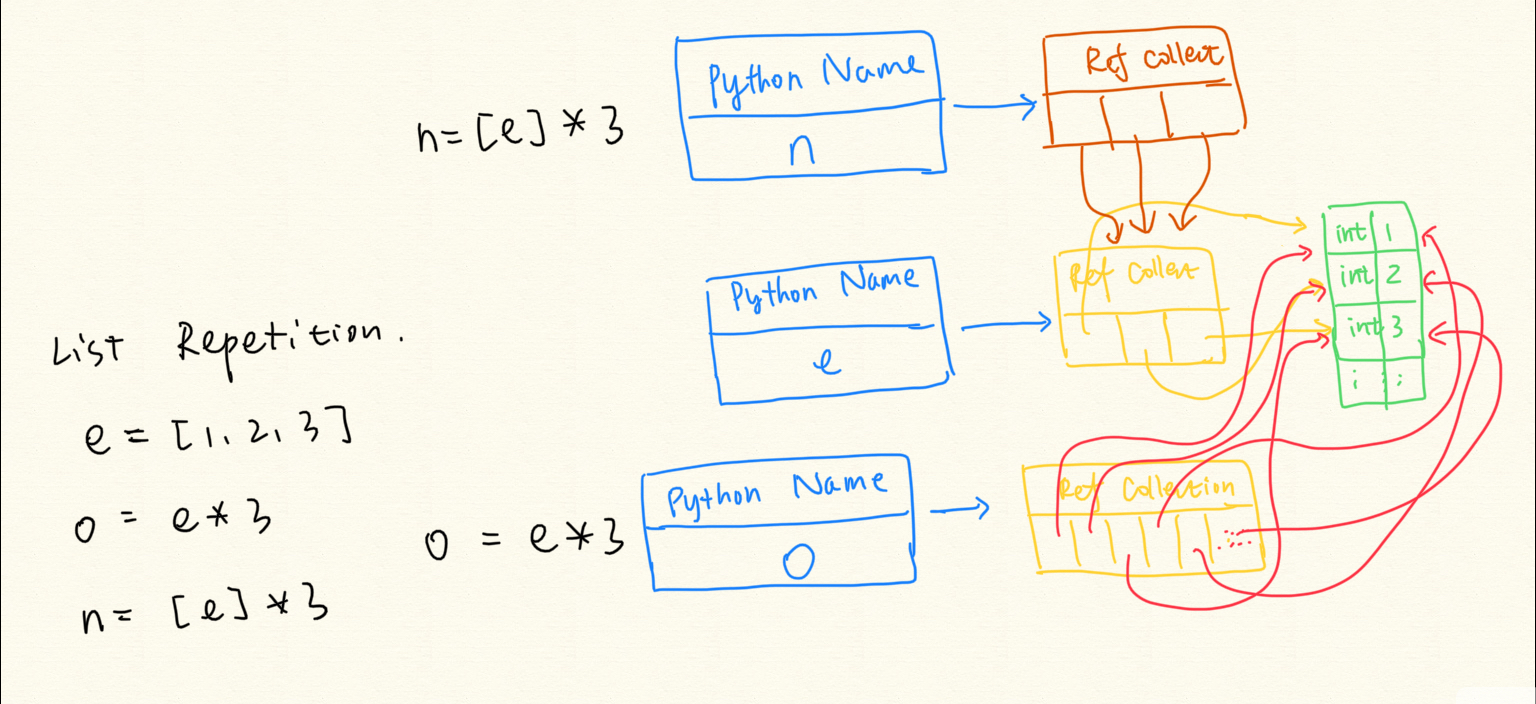

In [65]:
# similarly, updating n will also update e
n[0][0] = 100
print (n)
print (e)
print (o)

[[100, 2], [100, 2], [100, 2]]
[100, 2]
[1, 2, 3, 1, 2, 3, 1, 2, 3]


The underlining reference is the same, so updating n also causes changes in the original e

### * deep copy

In python a deep copy means create new name, reference and PyObject. Therefore, the two objects are totally seperated. <br>
Making a deep copy of a list is 
* list_b =  list_a[:]

In [124]:
a  = [1,2,3]
b = a[:]
print(id(a), id(b))

4409079600 4409068112


Let's use the same method in list repetition:

In [125]:
e = [1,2,3]
n3 = [e[:]] * 3
n3

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [126]:
print(id(e), "\n", [id(x) for x in n3], "\n", id(n3))

4409090128 
 [4409078240, 4409078240, 4409078240] 
 4409025072


Now as you can tell, each sublist in n3 no long has the same id as e. We can expect that any change in e won't cause the change in n3. We will see that in a minute.  <br>
Another interesting observation I want to point out is the three elements in n3 have the same id which were created by *.

In [127]:
# First, let's varify when we update e, n3 is not impact.
e[1] = 100
print (e)
print (n3)

[1, 100, 3]
[[1, 2, 3], [1, 2, 3], [1, 2, 3]]


now e[:] is a deep copy of the element e, so the change of e is on longer gonna cause the change in list n3. <br> Vice versa:

In [128]:
n3[0][0] = 12
print (n3,"\n", e)

[[12, 2, 3], [12, 2, 3], [12, 2, 3]] 
 [1, 100, 3]


Hold on, did you notice that? -- When you modify any values in any of the sublist, all three sublists will be udpated, as we show ealier, they share the same id. The actual reason is  * is making a shallow copy of the mutable list object. 

In [129]:
n3[0] = 12 
print (n3,"\n", e)

[12, [12, 2, 3], [12, 2, 3]] 
 [1, 100, 3]


But if you are simplely updating one element by assignment, then it won't cause the "chain change effect.", as it will create new reference. 

In [130]:
[id(x) for x in n3]

[4367234544, 4409078240, 4409078240]

>* The solution to the problem above is, you have to rebuild each list in n3, so that you can update each element independently

In [75]:
import copy

At a glance:

In [137]:
e = [1,2,3]
n4 = [e[:] for i in range(3)] #deep copy 
n5 = n4[:] # a shallow copy if n4
n6 = copy.deepcopy(n4) # this is a deep copy
n7 = [x[:] for x in n4] # also a deep copy
print ("", n4, "\n", n5, "\n", n6, "\n", n7)

 [[1, 2, 3], [1, 2, 3], [1, 2, 3]] 
 [[1, 2, 3], [1, 2, 3], [1, 2, 3]] 
 [[1, 2, 3], [1, 2, 3], [1, 2, 3]] 
 [[1, 2, 3], [1, 2, 3], [1, 2, 3]]


* using [e[:] for i in range(3)] instead of  [e[:]] * 3 to make deep copy

In [138]:
print([id(x) for x in n4], id(e))
n4[0][0] = 100
print (n4) #
print(e)

[4408936480, 4408952864, 4409028112] 4409024672
[[100, 2, 3], [1, 2, 3], [1, 2, 3]]
[1, 2, 3]


* When using [:] on list of lists, it is making shallow copy

In [141]:
print (n5) #n5 is a shallow copy of n4
print([id(x) for x in n5])

[[100, 2, 3], [1, 2, 3], [1, 2, 3]]
[4408936480, 4408952864, 4409028112]


In [142]:
print (n6) #n6 is a deep copy of n4
print([id(x) for x in n6])

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]
[4409205696, 4407425696, 4409043456]


In [143]:
print (n7) #n7 is also a deep copy of n4
print([id(x) for x in n7])

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]
[4406106704, 4409027792, 4409042176]


The reason that you didn't notice this with your first example of using copy([1,2]) is that the primitives like int are immutable, and thus it is impossible to change their value without creating a new instance. If the contents of the list had instead been mutable objects (like lists, or any user-defined object with mutable members), any mutation of those objects would have been seen in both copies of the list.

In [144]:
[id(x) for x in n4]

[4408936480, 4408952864, 4409028112]

Some refernces sites:
<br>
http://www.cs.rpi.edu/~sibel/csci1100/fall2015/course_notes/exam2_review/aliasing.html
https://runestone.academy/runestone/books/published/thinkcspy/Lists/ObjectsandReferences.html
https://realpython.com/pointers-in-python/#understanding-variables


https://realpython.com/python-pass-by-reference/